## Материалы:
* .[Презентация] (https://drive.google.com/drive/folders/1AMyblWt_8fJPfHHPkRW6RYjeYb743BiV?usp=share_link)
* .[Дашборд] (https://public.tableau.com/app/profile/.36176649/viz/_16732069691920/Dashboard1)


### Шаг 1. Откройте файл с данными и изучите общую информацию

1. Загрузите данные из файла в датафрейм;


2. Изучите общую информацию о полученном датафрейме.

In [1]:
#импортируем библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('/datasets/bank_dataset.csv')

In [3]:
#выведем общую информацию
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
#выведем первые 5 строк датафрейма
bank.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### Шаг 2. Предобработка данных

1. Замените названия столбцов (приведите к нижнему регистру); 


2. Обработайте пропуски при необходимости:
  
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;


3. Категоризуйте данные по возрастному признаку (столбец `Age` — возраст).


4. Сделайте промежуточный вывод.

In [5]:
#приведем названия стоблцов к нижнему регистру
bank.columns = bank.columns.str.lower()

In [6]:
#посмторим, в каких столбцах есть пропуски
bank.isna().sum()

userid                 0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
creditcard             0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

3617 значений пропущено только в столбце баланс. Не будем удалять и заполнять пропуски, так как этот столбец не повлияет на цель исследования. 

In [7]:
#проверим наличие дубликатов 
bank.duplicated().sum()

0

В датафрейме нет дубликатов.

In [8]:
#создадим столбец с возрастной категорией 
def age(row):
    if 18 <= row['age'] <= 35:
        return 'молодые'
    if 35 < row['age'] <= 55:
        return 'взрослые'
    else:
        return 'пожилые'
    
bank['age_type'] = bank.apply(age, axis=1)

bank.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_type
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,взрослые
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,взрослые
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,взрослые
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,взрослые
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,взрослые


In [9]:
#создадим столбец с типом зарплаты
def salary(row):
    if row['estimated_salary'] <= 50000:
        return 'до 50000'
    if  50000 < row['estimated_salary'] <= 100000:
        return 'от 50000 до 100000'
    else:
        return 'от 100000 до 200000'
    
bank['salary_type'] = bank.apply(salary, axis=1)

bank.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_type,salary_type
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,взрослые,от 100000 до 200000
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,взрослые,от 100000 до 200000
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,взрослые,от 100000 до 200000
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,взрослые,от 50000 до 100000
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,взрослые,от 50000 до 100000


### Шаг 3. Исследовательский анализ данных


1. Изучите колонки:

- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- Objects — количество объектов в собственности,
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- Loyalty — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

Постройте гистограмы для каждого из параметров.

2. Изучите, зависит ли ушел клиент или нет от:

- балла кредитного скоринга
- города
- пола
- возраста
- количества объектов в собственности
- баланса на счете
- заработной платы
- количества продуктов, которыми пользуется клиент
- наличия кредитной карты;


3. Постройте матрицу корреляций.


4. Опишите ваши наблюдения, сделайте выводы.

In [10]:
def histplot(data, column):
    sns.histplot(data, 
                 x=column, 
                 hue='churn', 
                 stat='density', 
                 common_norm=False, 
                 
                 palette='flag'
                )
    plt.title('Распределение')
    plt.xlabel(column)
    plt.ylabel('Количество')
    plt.show()

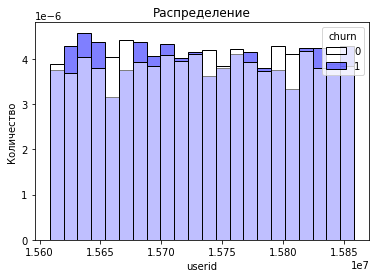

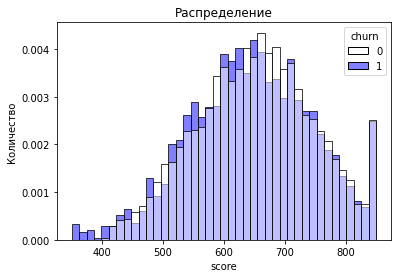

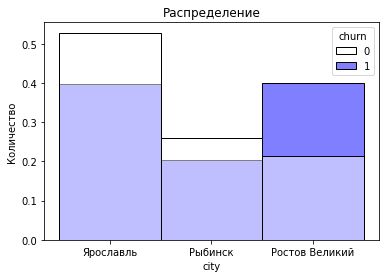

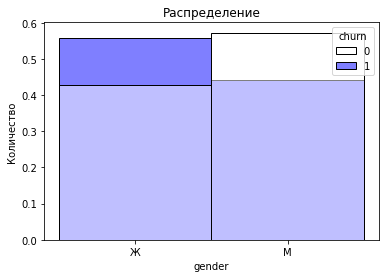

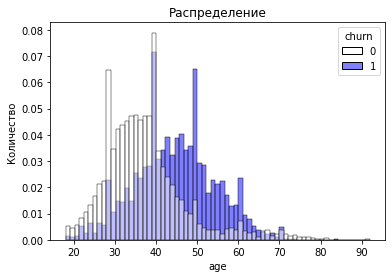

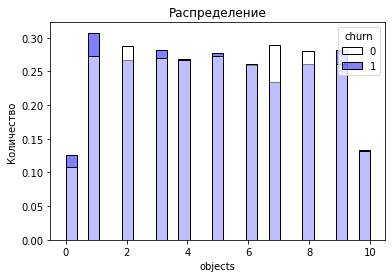

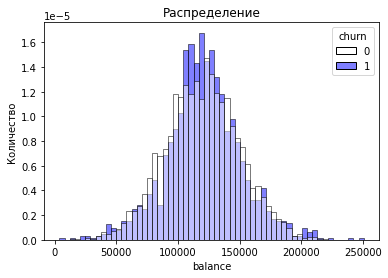

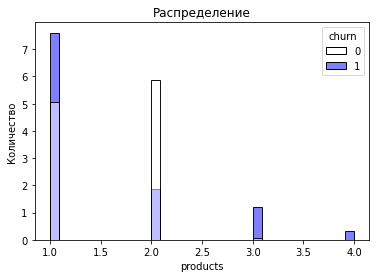

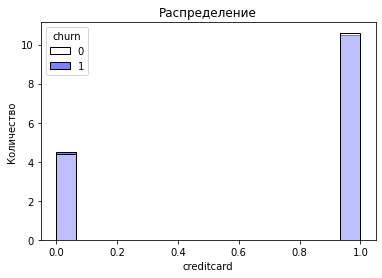

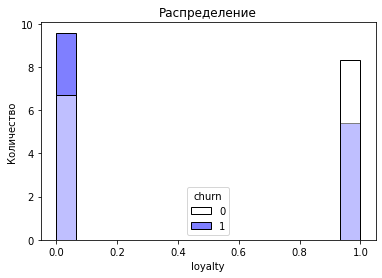

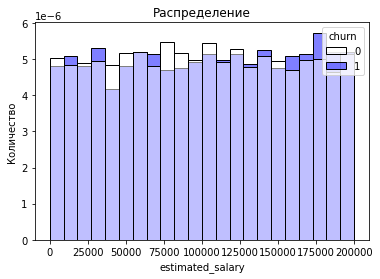

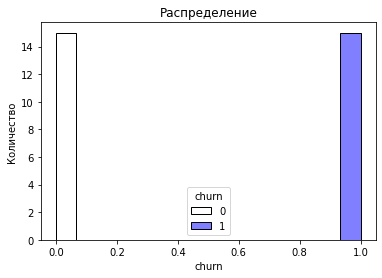

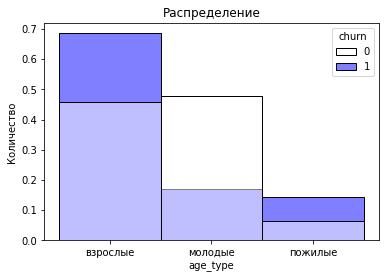

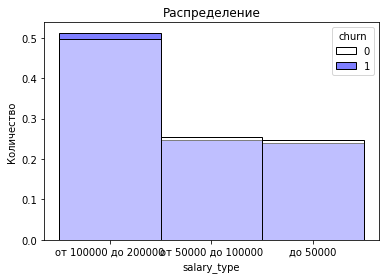

In [11]:
for column in bank.columns:
    histplot(bank, column)

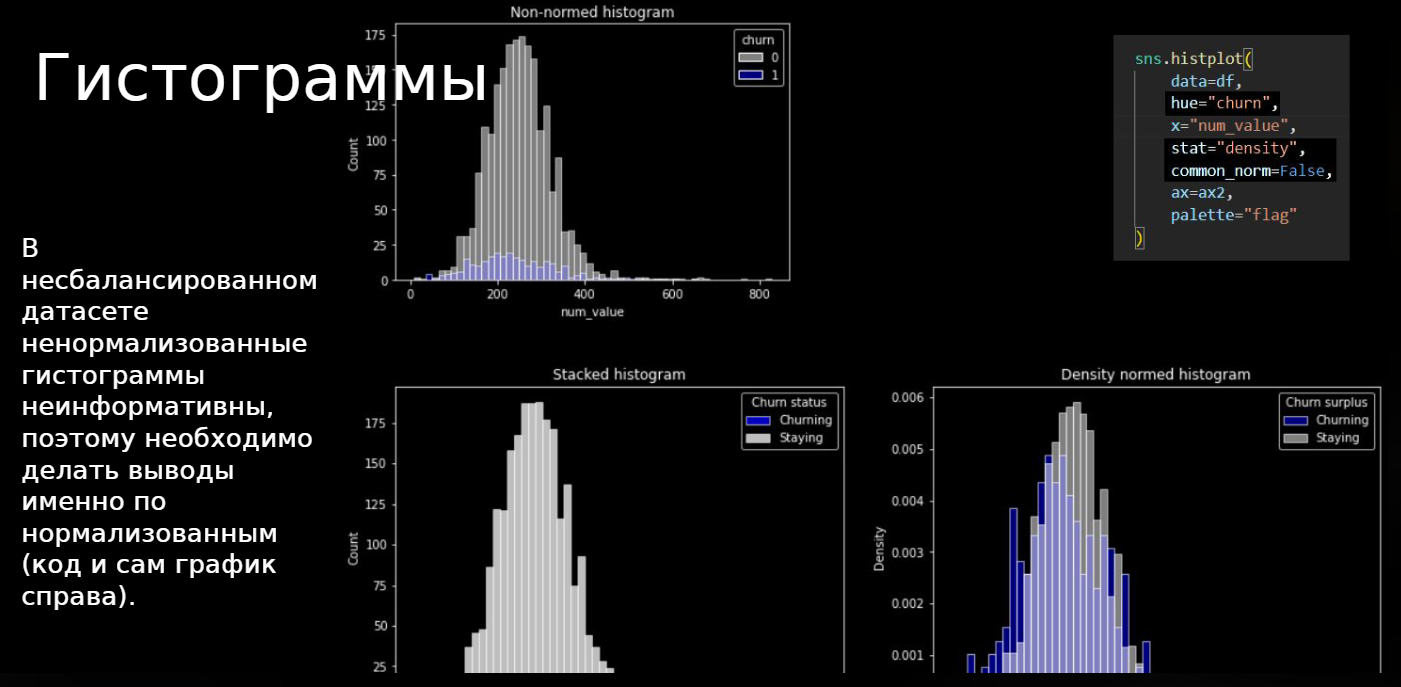

По данным графикам можно сделать вывод, что большая часть клиентов уходит:

- с баллом кредитного скоринга от 500 и выше;

- по городам - из Ростова Великого;

- по полу - женщины;

- по возрасту - от 30-ти и выше; 

- по количеству объектов в собственности +- в равной степени;

- по балнсу на счете - от 200000 доля ушедших составляет 100% и более;

- доля ушедших по количеству продуктов 3 и 4 составляет более 100%. Клиенты с 1-м и 2-мя продуктами меньше покидают банк;

- клиенты без кредитной карты и ее наличием в равной степени уходят из банка;

- доля неактивных клиентов, покидающих банк больше нежелеи активных;

- судя по графику зарплата не влияет на отток клиентов.




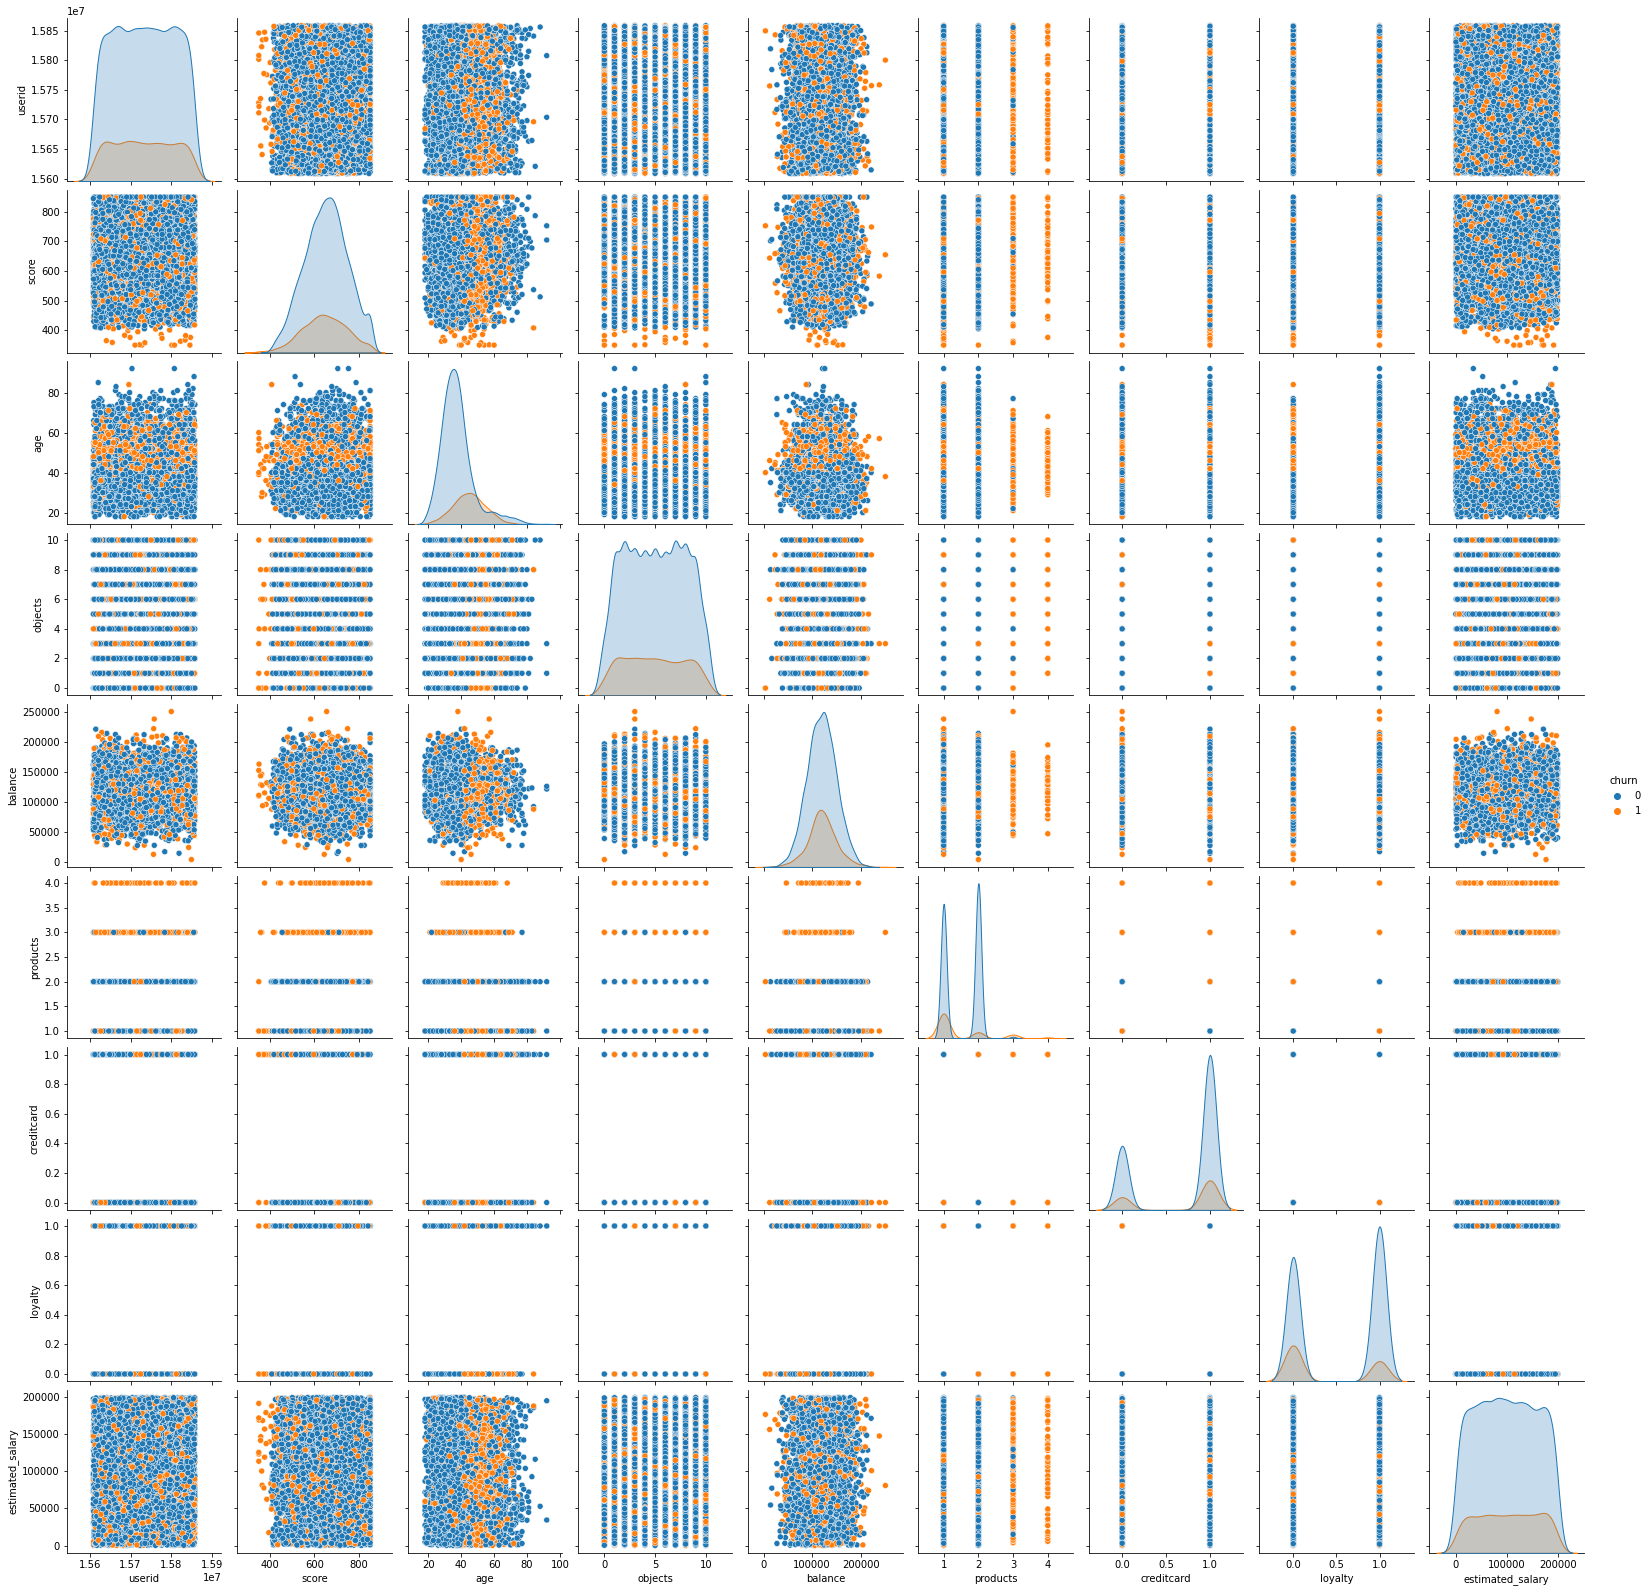

In [12]:
sns.pairplot(bank, hue='churn') 

In [13]:
bank[bank['churn'] == 1].describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,2.037000e+03,2037.000000,2037.000000,2037.000000,1537.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,1.573279e+07,645.351497,44.837997,4.932744,120746.971132,1.475209,0.699067,0.360825,101465.677531,1.0
std,7.269262e+04,100.321503,9.761562,2.936106,30555.192802,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,1.0
25%,1.567010e+07,578.000000,38.000000,2.000000,103700.690000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,1.573170e+07,646.000000,45.000000,5.000000,119948.090000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,1.579583e+07,716.000000,51.000000,8.000000,137986.580000,2.000000,1.000000,1.000000,152422.910000,1.0
max,1.585839e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


По представленным данным уходящих клиентов:

- минимальный балл кредитного скоринга составляет - 350, максимальный - 850, средний - 645;

- минимальный возраст - 18, максимальный - 84, средний - 44-45;

- минимум объектов в собственности - 0, максимум - 10, в среднем - 5;

- минимальный баланс - 3768, максимальный - 250898, в среднем - 120746;

- минимум продуктов - 1, максимум - 4, в среднем 1,5;

In [14]:
dct = {'Ярославль':0, 'Рыбинск':1, 'Ростов Великий':2}
bank['city_le'] = bank['city'].map(dct)
bank

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,age_type,salary_type,city_le
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,взрослые,от 100000 до 200000,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,взрослые,от 100000 до 200000,1
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,взрослые,от 100000 до 200000,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,взрослые,от 50000 до 100000,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,взрослые,от 50000 до 100000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,взрослые,от 50000 до 100000,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,молодые,от 100000 до 200000,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,взрослые,до 50000,0
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,взрослые,от 50000 до 100000,2


In [15]:
bank_1 = pd.get_dummies (bank, columns=['gender', 'city'], drop_first= True )

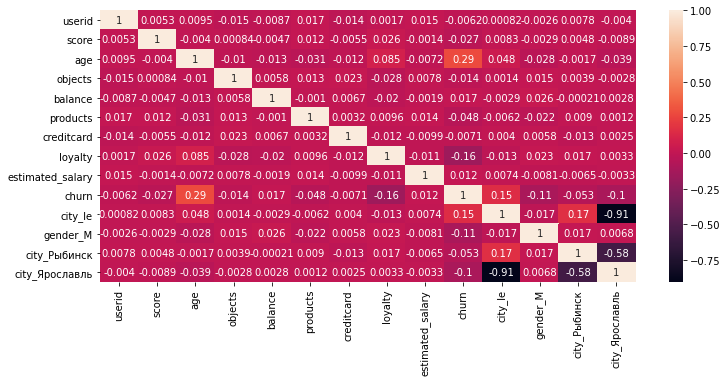

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(bank_1.corr(), annot=True);

По тепловой карте можно увидеть небольшую зависимость только от возраста и города.

### Шаг 4. Анализ оттока клиентов

1. Сегментируйте пользователей на основе данных о количестве потребляемых продуктов;


2. Изучите уровень оттока по географии, полу и возрасту;


3. Изучите уровень оттока по заработной плате клиента;


4. Напишите портрет клиента и сделайте рекомендации исходя из сегментации;


5. Подумайте, какой продукт может заинтересовать аудиторию;


6. Напишите выводы.

In [17]:
gender = bank.groupby('gender').agg({'churn':'mean'}).reset_index()
gender['percent, %'] = gender['churn']*100
gender

,gender,churn,"percent, %"
0,Ж,0.250715,25.071539
1,М,0.164559,16.455928


In [18]:
city = bank.groupby('city').agg({'churn':'mean'}).reset_index()
city['percent, %'] = city['churn']*100
city

,city,churn,"percent, %"
0,Ростов Великий,0.324432,32.443204
1,Рыбинск,0.166734,16.673395
2,Ярославль,0.161548,16.154767


In [19]:
age = bank.groupby('age_type').agg({'churn':'mean'}).reset_index()
age['percent, %'] = age['churn']*100
age

,age_type,churn,"percent, %"
0,взрослые,0.276600,27.659996
1,молодые,0.083554,8.355406
2,пожилые,0.367500,36.750000


In [20]:
salary = bank.groupby('salary_type').agg({'churn':'mean'}).reset_index()
salary['percent, %'] = salary['churn']*100
salary

,salary_type,churn,"percent, %"
0,до 50000,0.199348,19.934774
1,от 100000 до 200000,0.208383,20.838323
2,от 50000 до 100000,0.198660,19.865983


In [21]:
products = bank.groupby('products').agg({'churn':'mean'}).reset_index()
products['percent, %'] = products['churn']*100
products

,products,churn,"percent, %"
0,1,0.277144,27.714398
1,2,0.075817,7.581699
2,3,0.827068,82.706767
3,4,1.000000,100.000000


In [22]:
creditcard = bank.groupby('creditcard').agg({'churn':'mean'}).reset_index()
creditcard['percent, %'] = creditcard['churn']*100
creditcard

,creditcard,churn,"percent, %"
0,0,0.208149,20.814941
1,1,0.201843,20.184266


In [23]:
def show_barplot(x, data):
    ax = sns.barplot(x=x, y='percent, %', data=data, palette='Pastel1')
    ax.set_title('Доля оттока клиентов')
    ax.set_xlabel(x)
    ax.set_ylabel('Доля оттока, %')
    plt.show();

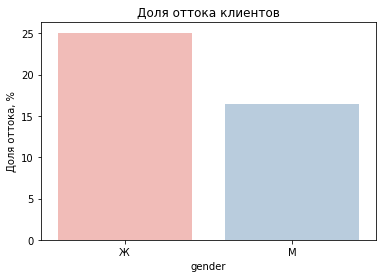

In [24]:
show_barplot(x='gender', data=gender)

Доля оттока женщин больше чем мужчин, 25% против 16%.

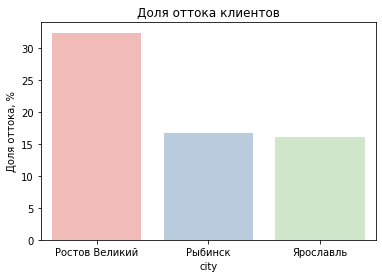

In [25]:
show_barplot(x='city', data=city)

Основной отток клиентов из Ростова Великого, 32% против 16%. Клиенты из Рыбинска и Ярославля в ранвной степени уходят.

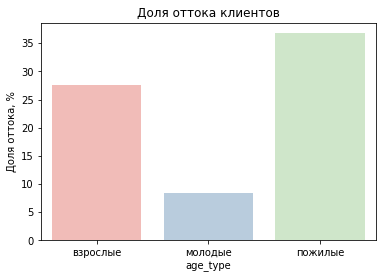

In [26]:
show_barplot(x='age_type', data=age)

Основной отток клиентов приходится на взрослых и пожилых. Молодые в меньшей степени покидают банк.

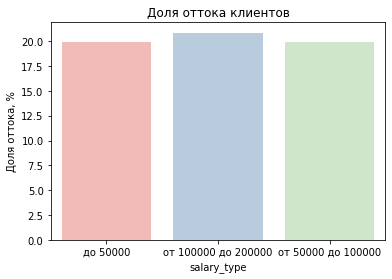

In [27]:
show_barplot(x='salary_type', data=salary)

Как видно из графика, уровень заработной платы клиентов практически не влияет на отток.

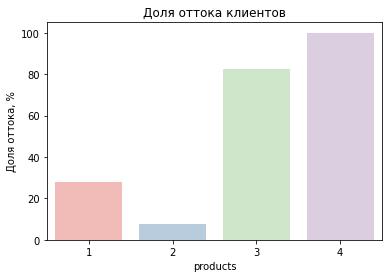

In [28]:
show_barplot(x='products', data=products)

Доля оттока клиентов с 3-мя и 4-мя продуктами аномально велика, 82% и 100% соответсвенно.

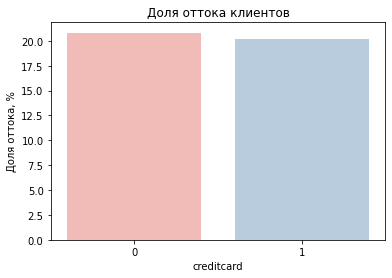

In [29]:
show_barplot(x='creditcard', data=creditcard)

Клиенты с наличием кредитной карты и с ее отсутствием в равной степени уходят из банка.

In [30]:
gender_products = bank.groupby(['gender', 'products']).agg(count=('userid', 'count')).reset_index()

city_products = bank.groupby(['city', 'products']).agg(count=('userid', 'count')).reset_index()

age_products = bank.groupby(['age_type', 'products']).agg(count=('userid', 'count')).reset_index()

objects_products = bank.groupby(['objects', 'products']).agg(count=('userid', 'count')).reset_index()

creditcard_products = bank.groupby(['creditcard', 'products']).agg(count=('userid', 'count')).reset_index()

loyalty_products = bank.groupby(['loyalty', 'products']).agg(count=('userid', 'count')).reset_index()

salary_products = bank.groupby(['salary_type', 'products']).agg(count=('userid', 'count')).reset_index()


In [ ]:
salary_products.info()

In [31]:
def barplot(x, data):
    ax = sns.barplot(x=x, y='count', data=data, hue='products', palette='Pastel2')
    ax.set_title('Сегментация пользователей по количеству продуктов')
    ax.set_xlabel(x)
    ax.set_ylabel('Количество клиентов')
    plt.show();

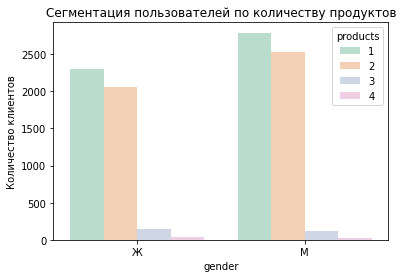

In [32]:
barplot(x='gender', data=gender_products)

Пользователи 1 и 2 продуктов - в большинстве мужчины

Пользователи 3-х и 4-х - в большинстве женщины

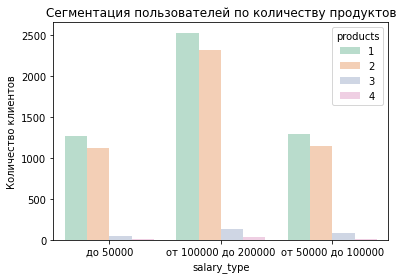

In [33]:
barplot(x='salary_type', data=salary_products)

По зарплате большая часть пользователей 1 и 2-х продуктов с зарплатой от 100 до 200 тыс. рублей

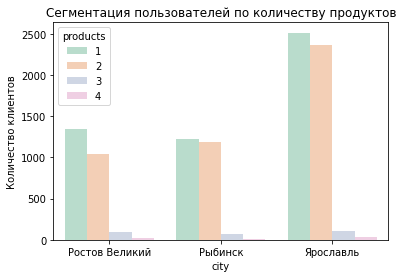

In [34]:
barplot(x='city', data=city_products)

Пользователи 1 и 2 продуктов - в основном из Ярославля

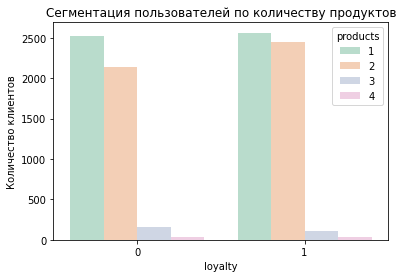

In [35]:
barplot(x='loyalty', data=loyalty_products)

Пользователи 3-х и 4-х продуктов менее активны

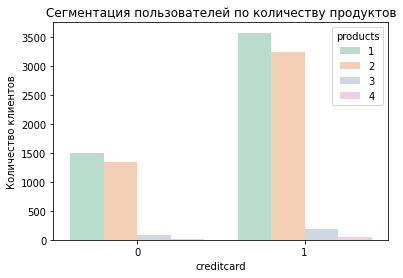

In [36]:
barplot(x='creditcard', data=creditcard_products)

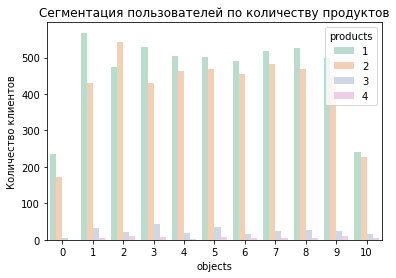

In [37]:
barplot(x='objects', data=objects_products)

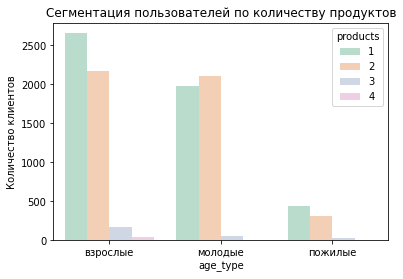

In [38]:
barplot(x='age_type', data=age_products)

Пользователи 1 и 2 продуктов чаще молодые и взрослые 

Портреты клиентов на основе сегментации по количеству продуктов:

- Пользователи 1 продукта: мужчины от 35 до 55 лет с зарплатой от 100 до 200 тыс.руб., из Ярославля, с наличием кредитной карты, с одним объектом в собственности;


- Пользователи 2-х продуктов: мужчины от 18 до 55 лет с зарплатой от 100 до 200 тыс.руб., из Ярославля, с наличием кредитной карты, с двумя объектами в собственности, активные;


- Пользователи 3-х продуктов: женщины от 35 до 55 лет с зарплатой от 100 до 200 тыс.руб., из Ярославля, с наличием кредитной карты, с тремя объектами в собственности, неактивные;


- Пользователи 4-х продуктов: женщины от 35 до 55 лет с зарплатой от 100 до 200 тыс.руб., из Ярославля, с наличием кредитной карты, с 9 объектами в собственности, активные;



### Шаг 5. Статистический анализ данных

1. Проверьте гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;


 - H0: Уровень дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаковый.

   H1: Уровень дохода разный.


2. Сформулируйте и проверьте статистическую гипотезу относительно представленных данных.


   - H0: Между долями клиентов Ярославля и Рыбинска, которые ушли нет значимой разницы.

     H1: Доли клиентов Ярославля и Рыбинска неравны.
   
   
   - H0: Между долями клиентов Ярославля и Ростова Великого, которые ушли нет значимой разницы.
   
     H1: Доли клиентов Ярославля и Ростова Великого неравны.
   
   
   - H0: Между долями клиентов Ростова Великого и Рыбинска, которые ушли нет значимой разницы.
   
     H1: Доли клиентов Ростова Великого и Рыбинска неравны.


3. Сделайте вывод.

H0: Уровень дохода между клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним одинаковый.

H1: Уровень дохода разный.

In [39]:
results = st.ttest_ind(
    bank[bank['products'] == 1]['estimated_salary'],
    bank[bank['products'] == 2]['estimated_salary'], equal_var = False)# results = вызов метода для проверки гипотезы

alpha = .05# alpha = задайте значение уровня значимости

print(results.pvalue)# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')# условный оператор с выводом строки с ответом

0.4106493940071987
Не получилось отвергнуть нулевую гипотезу


- H0: Между долями клиентов Ярославля и Рыбинска, которые ушли нет значимой разницы.

     H1: Доли клиентов Ярославля и Рыбинска неравны.
   

In [40]:
def check_validity(converted, trials, alpha=.05):

    
    p1 = converted[0]/trials[0]


    p2 = converted[1]/trials[1]


    p_combined = (converted[0] + converted[1]) / (trials[0] + trials[1])


    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)


    if p_value < alpha:

        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')

    else:

        print(

            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'

        )

    return p_value

In [41]:
pivot_city = bank.pivot_table(index='city', values='churn', aggfunc=['sum', 'count'])
pivot_city

,sum,count
,churn,churn
city,,
Ростов Великий,814,2509
Рыбинск,413,2477
Ярославль,810,5014


In [42]:
p_value = check_validity(

    converted=np.array([pivot_city.loc['Ярославль', 'sum'], pivot_city.loc['Рыбинск', 'sum']]),

    trials=np.array([pivot_city.loc['Ярославль', 'count'], pivot_city.loc['Рыбинск', 'count']])
)

p-значение:  [0.56776102]
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


- H0: Между долями клиентов Ярославля и Ростова Великого, которые ушли нет значимой разницы.
   
     H1: Доли клиентов Ярославля и Ростова Великого неравны.

In [43]:
p_value = check_validity(

    converted=np.array([pivot_city.loc['Ярославль', 'sum'], pivot_city.loc['Ростов Великий', 'sum']]),

    trials=np.array([pivot_city.loc['Ярославль', 'count'], pivot_city.loc['Ростов Великий', 'count']])
)

p-значение:  [0.]
Отвергаем нулевую гипотезу: между долями есть значимая разница


- H0: Между долями клиентов Ростова Великого и Рыбинска, которые ушли нет значимой разницы.
   
     H1: Доли клиентов Ростова Великого и Рыбинска неравны.

In [44]:
p_value = check_validity(

    converted=np.array([pivot_city.loc['Ростов Великий', 'sum'], pivot_city.loc['Рыбинск', 'sum']]),

    trials=np.array([pivot_city.loc['Ростов Великий', 'count'], pivot_city.loc['Рыбинск', 'count']])
)

p-значение:  [0.]
Отвергаем нулевую гипотезу: между долями есть значимая разница


### Выводы

В ходе исследования было выявлено:

- основной отток клиентов банка приходится на Ростов Великий, порядка 32% по сравнению с 16%: в Рыбинске и Ярославле;

- распределение оттока клиентов говорит, что основная доля оттока приходится на людей возрастной группы пожилые -36% от группы и взрослые - 27% от группы. Группа молодые относительно остальных показывает минимальный отток в размере 8% от группы;

- анализ оттока клиентов по зарплатной сегментации показывает равновесный отток в размере 20% по каждой группе зарплат;

- при анализе оттока клиентов по количеству потребляемых ими продуктов банка, наблюдается аномальный отток в группе клиентов с количеством продуктов 4 - 100% и 3 - 82%, при наличии одного продукта, отток составляет порядка 27%. Самым оптимальным оказывается наличие двух продуктов у клиента, отток составляет всего 7% от группы;


- отток при наличии или отсутствии кредитной карты одинаково составил 20% от группы;

Учитывая вышеприведённые выводы, считаем целесообразным в первую очередь акцентировать внимание на:

- продуктах банка и их количестве у клиента, так как при использовании более трех продуктов, наблюдается крайне высокий отток клиентов. Причины могут варьироваться от высокой стоимости самих продуктов, награможденности клиента таким количеством продуктов, так и излишним навязываением банком своих продуктов;

- уровень дохода как таковой не имеет сильного влияния на отток клиентов, в связи с чем можно сделать предположение, что стоимостная нагрузка на клиента не является ключевой при принятии решения об отказе в использовании продукта.

Дополнительно, анализ клиентов по полу показывает, что отток женской аудитории значительно выше - 25% против оттока мужской - 16%. Вероятно, стоит пересмотреть направленность услуг для женской категории потребителей.

Продукт, который может заинтересовать аудиторию должен быть ориентирован на женскую аудиторию в группах взрослые и пожилые.

По количеству продуктов можно сегментировать клиентов на 2 большие группы.

Пользователи 1 и 2 продуктов (с низким уровнем оттока 28% и 8% соответсвенно): в большинстве мужчины, с зарплатой от 100 до 200 тыс. руб., из Ярославля, с наличием кредитной карты, от 1 до 9 объектов в собственности, возраст от 18 до 35;

Рекомендации: 
- предоставить лучший сервис;
- пакетные и специальные предложения;
- привлечь новых клиентов, относящиеся к данной категории, так как они меньше склонны к оттоку;


Пользователи 3 и 4 продуктов (аномально высокий отток 82% и 100% соответсвенно): женщины, с зарплатой от 100 до 200 тыс. руб., из Ярославля, с наличием кредитной карты, преимущественно от 35 до 55 лет;

Рекомендации: 
- с социальной стороны проанализировать, почему происходит отток (поговорить с сотрудниками банка, с клиентами, таким образом можно продемонстрировать, что вам не все равно);
- вовлекать клиентов в работу с вашим продуктом, показывая повседневную ценность;
- предоставить клиентам качественные обучающие материалы для пользования продуктами;
- пакетные и специальные предложения;
- в дальнейшем уделять данной категории больше внимание, дабы не допустить еще больший отток;


- Вклады для пенсионеров и людям предпенсионного возраста с хорошей % ставкой и на выгодных условиях

- Кредиты неработающим пенсионерам под маленький %

Для женщин:

- Кэшбэки при покупке в продуктовых магазинах, магазинах одежды и косметики, так как женщины чаще занимаются покупками в этих категориях магазинов

- Рассрочки на короткий срок